# Stock Market Analysis using LSTM

In [5]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 64.9 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=728067 sha256=051827a0936bdf67e5afca9619f66227f6c03d4d858732ecc61cebd4547fbda2
  Stored in directory: /root/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as data

In [7]:
start = '2010-01-01'
end = '2019-12-31'

df = data.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351058,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.908981,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974487,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342972,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316284,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.733612,144114400


In [9]:
df = df.reset_index()

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351058,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800


In [11]:
df = df.drop(columns=['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


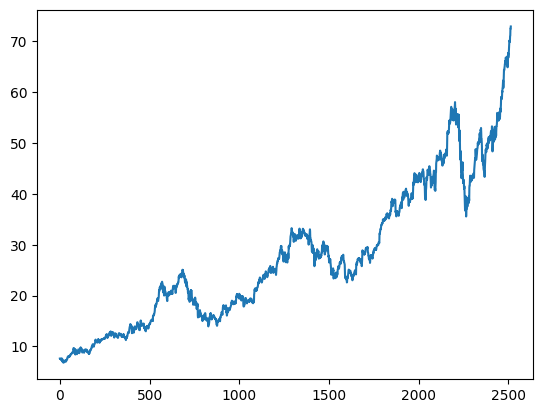

In [12]:
plt.plot(df.Close)

In [13]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [14]:
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,59.201075
2511,59.401700
2512,59.643125
2513,59.875125


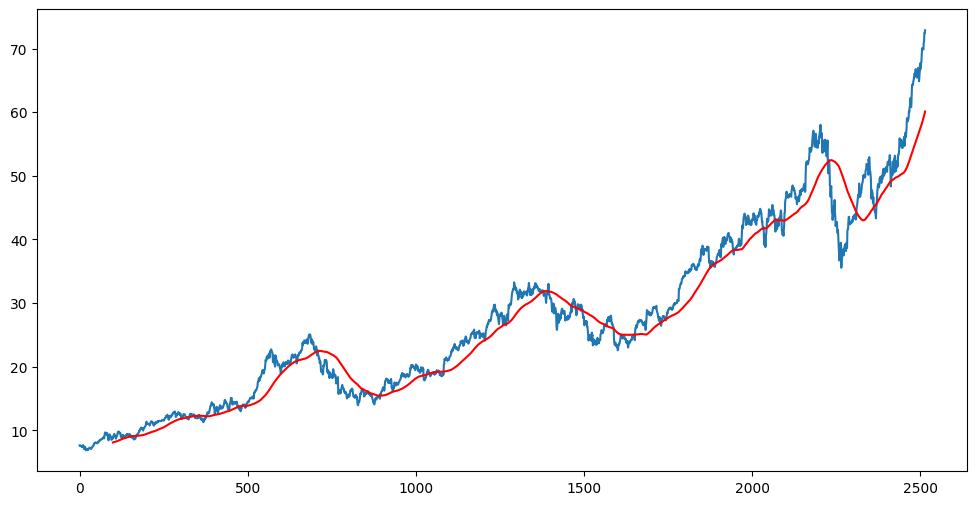

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [16]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,54.132313
2511,54.261513
2512,54.396763
2513,54.529350


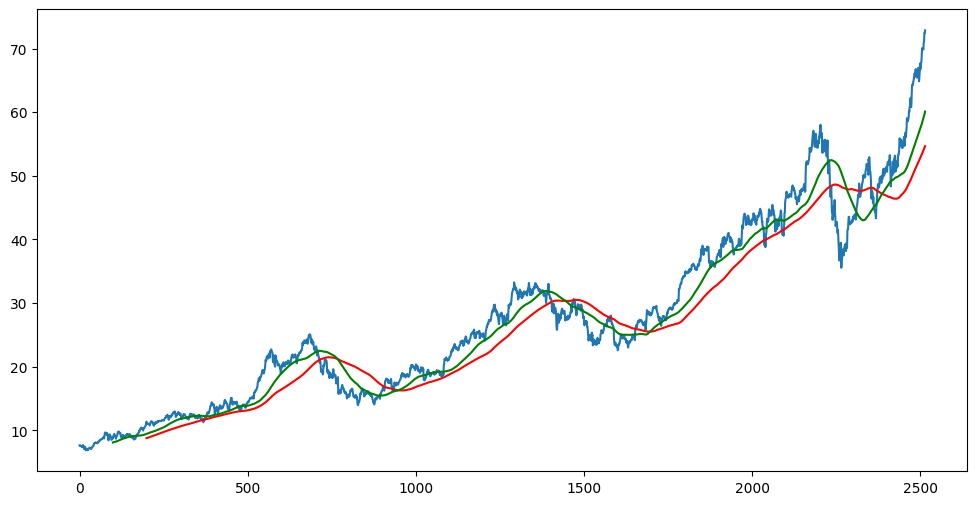

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma200, 'r')
plt.plot(ma100, 'g')

In [18]:
df.shape

(2515, 5)

In [19]:
# Splitting data into train and test data

train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(train.shape)
print(test.shape)

(1760, 1)
(755, 1)


In [20]:
train.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [21]:
test.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [23]:
train_arr = scaler.fit_transform(train)

In [24]:
train_arr

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [25]:
train_arr.shape

(1760, 1)

In [26]:
x_train = []
y_train = []

for i in range(100, train_arr.shape[0]):
    x_train.append(train_arr[i-100: i])
    y_train.append(train_arr[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
np.isnan(x_train).any(), np.isinf(x_train).any()

(False, False)

In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [29]:
import tensorflow as tf

In [30]:
model = Sequential()

model.add(LSTM(units = 50, activation = "relu", return_sequences=True, input_shape=(100, 1)))
model.add(Dropout(0.3))

model.add(LSTM(units = 60, activation = "relu", return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = "relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [32]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 14s 185ms/step - loss: 0.0673
Epoch 2/50
52/52 [==============================] - 9s 181ms/step - loss: 0.0126
Epoch 3/50
52/52 [==============================] - 10s 185ms/step - loss: 0.0120
Epoch 4/50
52/52 [==============================] - 10s 184ms/step - loss: 0.0110
Epoch 5/50
52/52 [==============================] - 10s 186ms/step - loss: 0.0085
Epoch 6/50
52/52 [==============================] - 10s 184ms/step - loss: 0.0081
Epoch 7/50
52/52 [==============================] - 9s 181ms/step - loss: 0.0082
Epoch 8/50
52/52 [==============================] - 9s 181ms/step - loss: 0.0082
Epoch 9/50
52/52 [==============================] - 9s 181ms/step - loss: 0.0072
Epoch 10/50
52/52 [==============================] - 9s 176ms/step - loss: 0.0066
Epoch 11/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0075
Epoch 12/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0072
Epoch 13/50
52/52 [=

In [36]:
model.save('stock_model_50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
test.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [38]:
train.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [78]:
past_100_days = train.tail(100)

In [79]:
final_df = pd.concat([past_100_days, test], ignore_index=True)

In [80]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [81]:
input_data = scaler.transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [82]:
input_data.shape

(855, 1)

In [83]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [84]:
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [85]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 1s 55ms/step


In [86]:
y_predicted.shape

(755, 1)

In [87]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [88]:
y_predicted

array([[0.12075849],
       [0.12114254],
       [0.12156408],
       [0.12200892],
       [0.12247267],
       [0.12294817],
       [0.12342684],
       [0.12390107],
       [0.12436789],
       [0.12482588],
       [0.12527962],
       [0.1257333 ],
       [0.12618838],
       [0.12664995],
       [0.12712316],
       [0.12761094],
       [0.12811565],
       [0.12863892],
       [0.12917745],
       [0.1297358 ],
       [0.13031952],
       [0.1309345 ],
       [0.131583  ],
       [0.1322511 ],
       [0.13295937],
       [0.13373208],
       [0.13459235],
       [0.13557346],
       [0.13671088],
       [0.13803715],
       [0.13957962],
       [0.14135373],
       [0.14336663],
       [0.1456232 ],
       [0.14812364],
       [0.15086159],
       [0.1538252 ],
       [0.1569999 ],
       [0.16036126],
       [0.16389433],
       [0.16757557],
       [0.17136662],
       [0.1752415 ],
       [0.17918007],
       [0.18314894],
       [0.18712793],
       [0.19110425],
       [0.195

In [89]:
scaler.scale_

array([0.02123255])

In [90]:
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

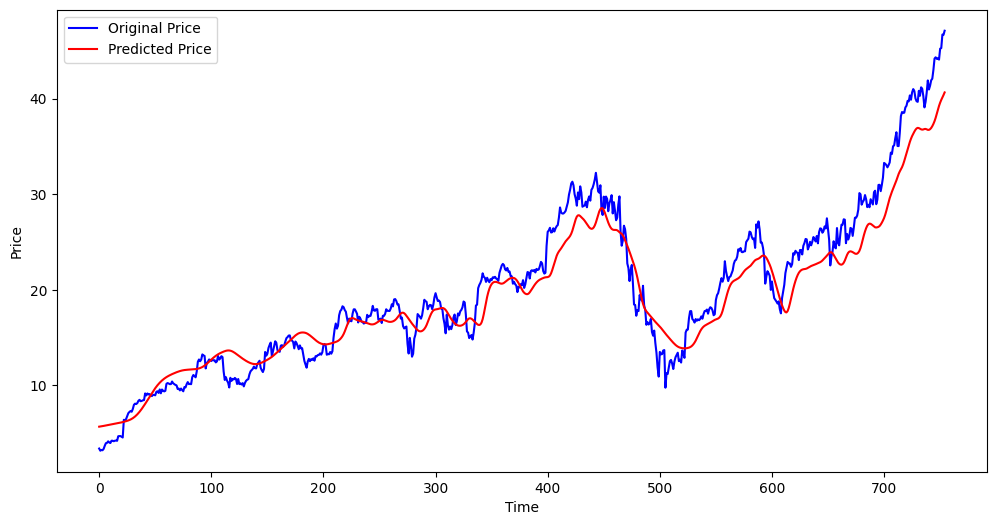

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()